In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,count
Attrition,
No,1233
Yes,237


In [6]:
attrition_dummies = pd.get_dummies(df['Attrition'])

In [7]:
df = pd.concat([df, attrition_dummies] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,False,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,True,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,False,True
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,True,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,True,False


In [8]:
df = df.drop(['EmployeeCount' , 'EmployeeNumber',] , axis = 1)

<Axes: xlabel='Attrition', ylabel='count'>

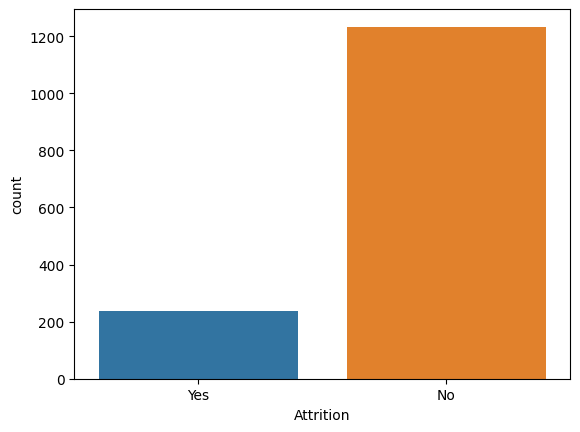

In [9]:
sns.countplot(x = 'Attrition' ,data = df)

In [10]:
plt.savefig('past_attr.png')

<Figure size 640x480 with 0 Axes>

In [12]:
BarPlot_columns=['Age','JobLevel','JobRole','TotalWorkingYears',
                'WorkLifeBalance','YearsInCurrentRole','Gender','BusinessTravel']

In [13]:
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

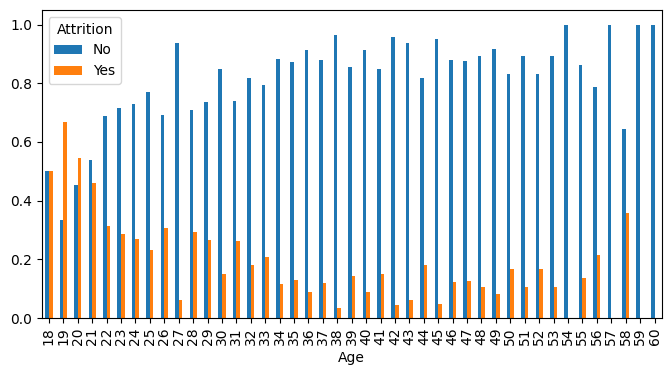

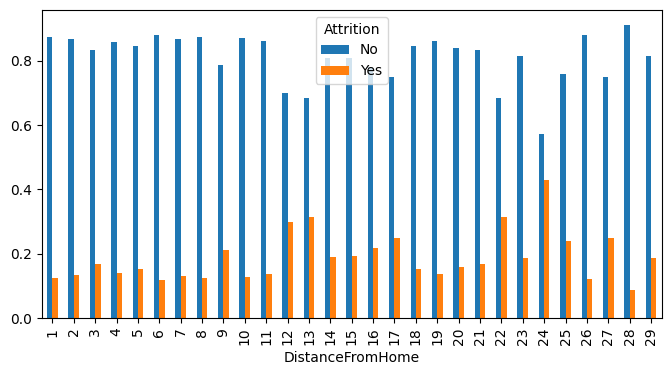

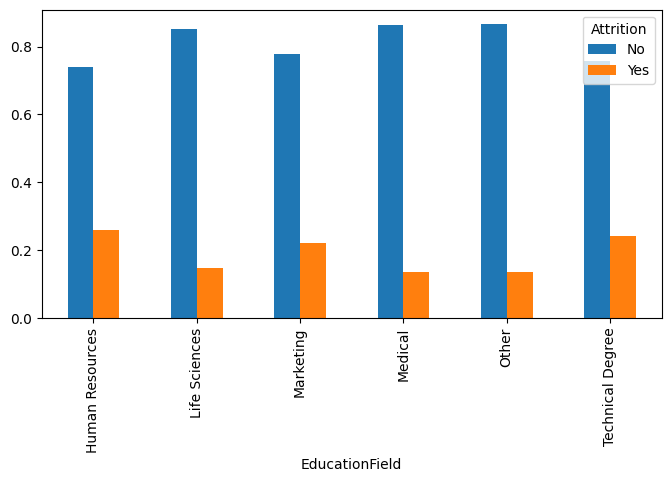

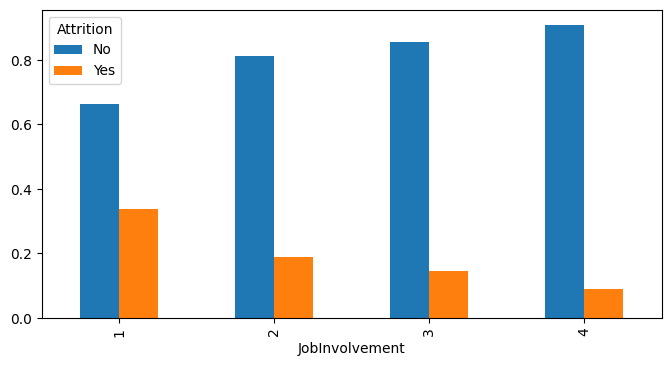

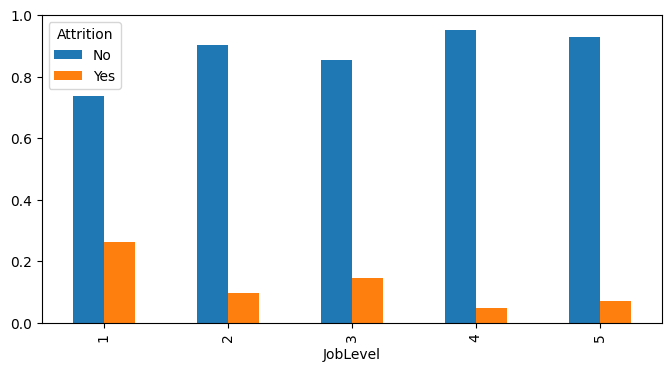

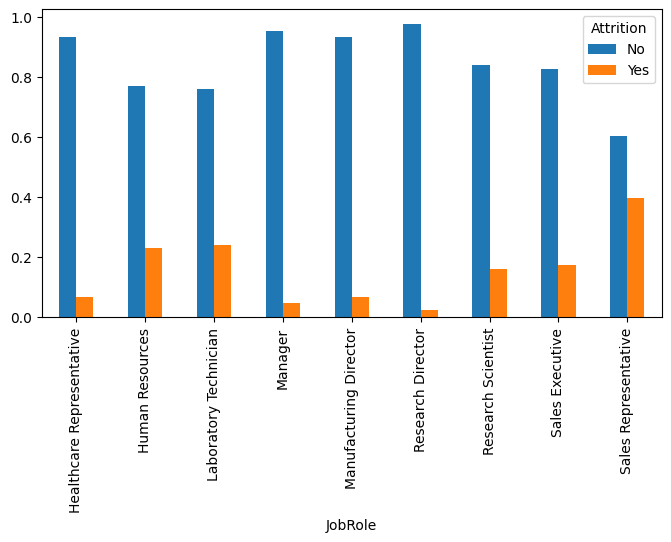

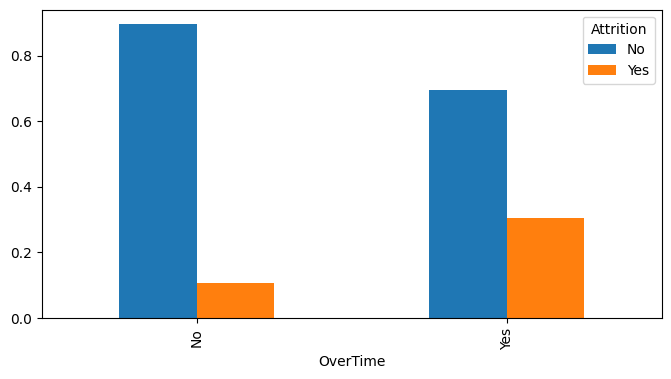

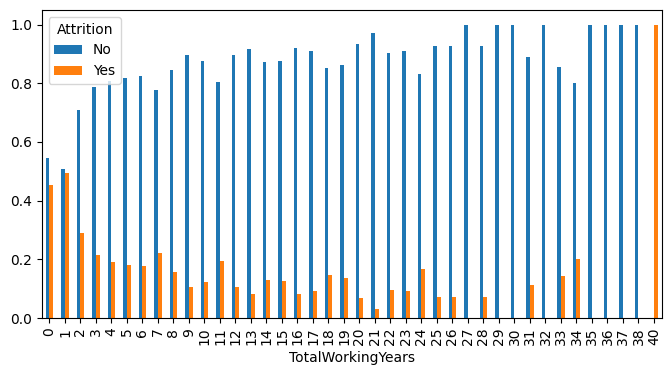

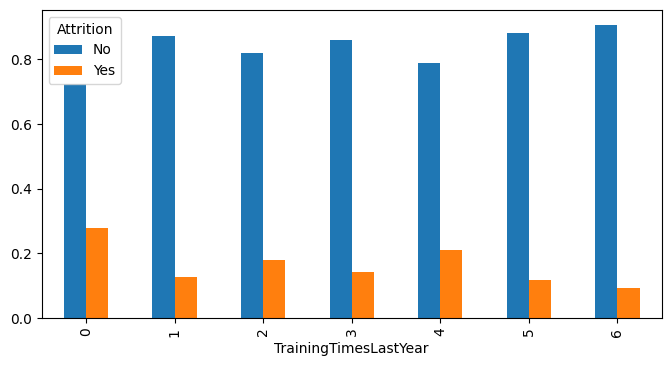

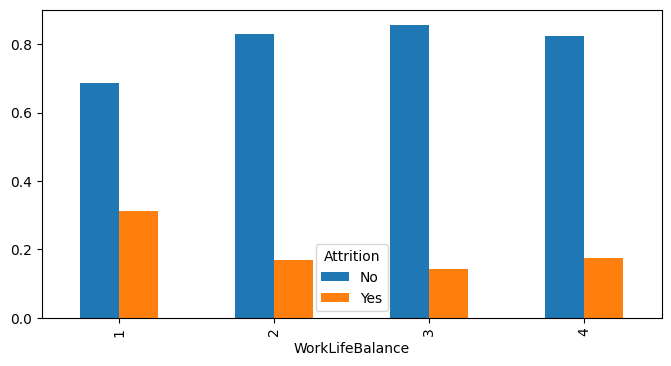

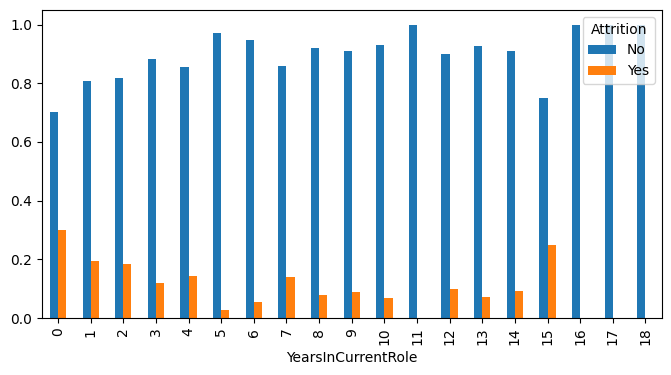

In [15]:
for col in BarPlot_columns:
        ot=Bar_plots(col)
        plt.savefig(f"{col}.jpg")

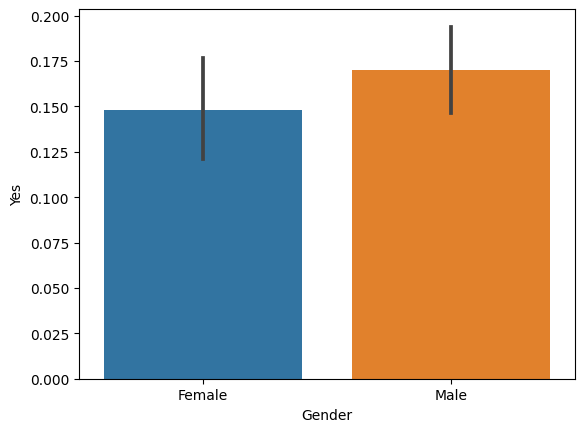

In [17]:
sns.barplot(x = 'Gender' , y = 'Yes', data = df)
plt.savefig("GendervsAtt.jpg")



In [16]:
df = df.drop(['Attrition' , 'No'] , axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,80,0,8,0,1,6,4,0,5,True
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,80,1,10,3,3,10,7,1,7,False
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,80,0,7,3,3,0,0,0,0,True
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,80,0,8,3,3,8,7,3,0,False
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,80,1,6,3,3,2,2,2,2,False


In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Travel_Rarely'

<Figure size 1000x600 with 0 Axes>

In [19]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

C:\Users\Hello\AppData\Local\Temp\ipykernel_455620\4259945406.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\Hello\AppData\Local\Temp\ipykernel_455620\4259945406.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\Hello\AppData\Local\Temp\ipykernel_455620\4259945406.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\Hello\AppData\Local\Temp\ipykernel_455620\4259945406.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [22]:
x  = df.drop(['Yes'], axis = 1)
y = df['Yes']

In [23]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [24]:
kk = rf.fit(x_train, y_train)

In [26]:
pred = kk.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [27]:
new_df = x_test
new_df['Attr'] = pred
new_ct = pd.DataFrame(new_df['Attr'].value_counts())
new_ct

,count
Attr,
0,427
1,14


In [ ]:
plt.pie(new_ct['Attr'] , labels = ['No{427}' , 'Yes{14}'] , explode = (0.2,0))
